### Autoencoders Project with Fashion-MNIST Dataset

#### 1. Business Problem:

- Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

#### 2. Data Understanding:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# load data 
# etiketlere yani y değerlerine ihtiyacımız yok bu nedenle _ şeklinde belirtiyoruz

(x_train, _), (x_test, _) = fashion_mnist.load_data()

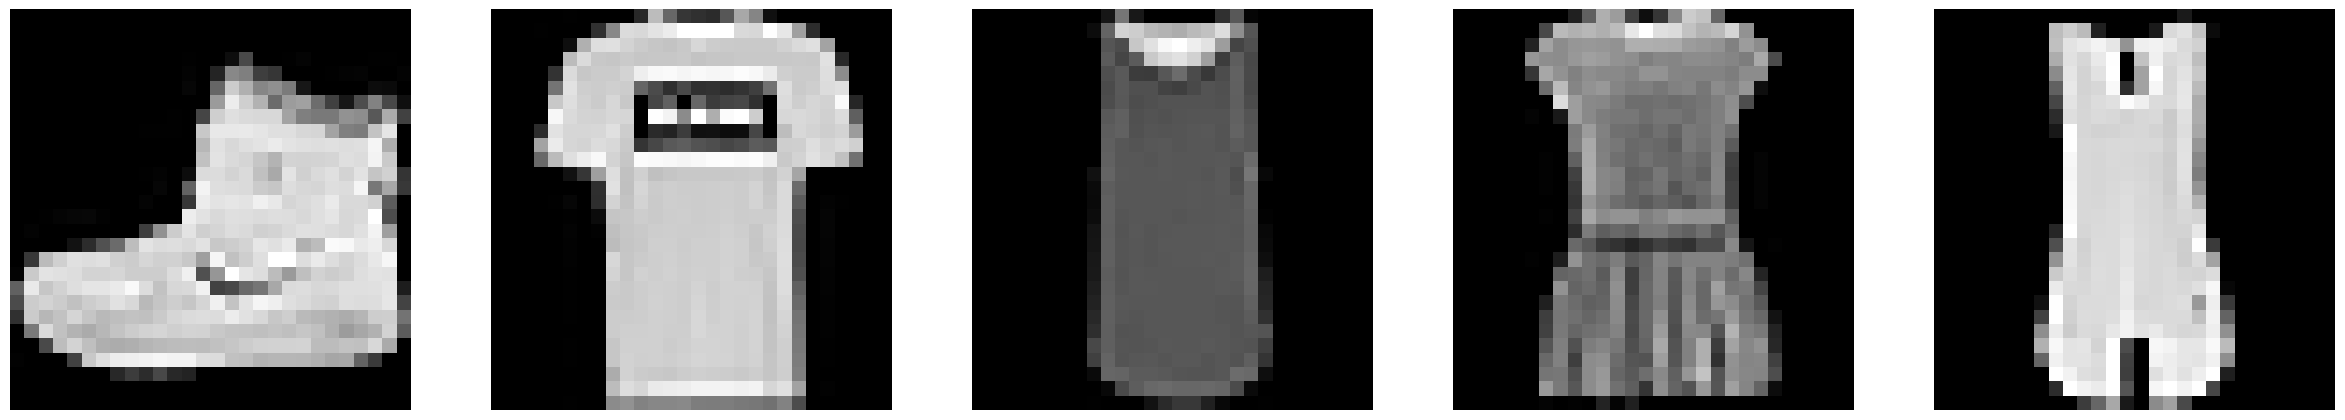

In [3]:
plt.figure(figsize = (30, 24))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")

plt.show()

#### 3. Data Preparation:

In [4]:
# Normalization 

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
# veriyi düzleştirelim(flaten) 28*28 boyutundaki görüntüleri 784 boyutunda bir vektöre(tek boyutlu bir vektör) dönüştür

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [6]:
print(f"x_train boyutu: {x_train.shape}")
print(f"x_test boyutu: {x_test.shape}")

x_train boyutu: (60000, 784)
x_test boyutu: (10000, 784)


#### Modelling:

In [13]:
# autoencoder için model parametrelerinin tanımlanması 

input_dim = x_train.shape[1]
encoding_dim = 64 # latent boyutu(veriyi sıkıştırdıktan sonra elde ettiğimiz veri parçasının boyutu) 


# encoder part 
input_image = Input(shape = (input_dim, )) # girdi boyutunu belirleme 784
encoded = Dense(256, activation = "relu")(input_image) # ilk gizli katman, 256 nöron
encoded = Dense(128, activation = "relu")(encoded) # ikinci gizli katman, 128 nöron
encoded = Dense(encoding_dim, activation = "relu")(encoded) # latent space yani sıkıştırma katmanı

# decoder part
decoded = Dense(128, activation = "relu")(encoded) # ilk genişletme katmanı, 128 nöron
decoded = Dense(256, activation = "relu")(decoded) # ikinci genişletme katmanı, 256 nöron
decoded = Dense(input_dim, activation = "sigmoid")(decoded) # çıktı katmanı 784 boyutlu

# Autoencoders
autoencoder = Model(input_image, decoded)

# compile
autoencoder.compile(optimizer = Adam(), loss = "binary_crossentropy")

In [14]:
# training
history = autoencoder.fit(
    x_train, # girdi ve hedef(target) aynı değer olmalı (otonom öğrenme)
    x_train,
    epochs = 50,
    batch_size = 64,
    shuffle = True, # eğitim verilerini karıştır
    validation_data = (x_test, x_test),
    verbose = 1)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.3622 - val_loss: 0.2947
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2895 - val_loss: 0.2855
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2819 - val_loss: 0.2815
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2784 - val_loss: 0.2778
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2760 - val_loss: 0.2779
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2735 - val_loss: 0.2751
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2723 - val_loss: 0.2733
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2714 - val_loss: 0.2725
Epoch 9/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2702 - val_loss: 0.2722
Epoch 10/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2688 - val_loss: 0.2710
Epoch 11/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.2686 - val_loss: 0.2703
Epoch 12/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

- **1.Training Sonuçları:**
  - **loss: 0.2618** - **val_loss: 0.2651**


In [ ]:
# Bu modeli sadece test için tanımladık asıl modelimiz ilki 
# Modeli biraz daha derinleştirip tekrar eğitelim , sonuçları karşılaştıralım

input_dim = x_train.shape[1]
encoding_dim = 64 # latent boyutu(veriyi sıkıştırdıktan sonra elde ettiğimiz veri parçasının boyutu) 


# encoder part 
input_image = Input(shape = (input_dim, )) # girdi boyutunu belirleme 784
encoded = Dense(512, activation = "relu")(input_image) # ilk gizli katman, 512 nöron
encoded = Dense(256, activation = "relu")(encoded) # ikinci gizli katman, 256 nöron
encoded = Dense(128, activation = "relu")(encoded) # üçüncü gizli katman, 128 nöron
encoded = Dense(encoding_dim, activation = "relu")(encoded) # latent space yani sıkıştırma katmanı

# decoder part
decoded = Dense(128, activation = "relu")(encoded) # ilk genişletme katmanı, 128 nöron
decoded = Dense(256, activation = "relu")(decoded) # ikinci genişletme katmanı, 256 nöron
decoded = Dense(512, activation = "relu")(decoded) 
decoded = Dense(input_dim, activation = "sigmoid")(decoded) # çıktı katmanı 784 boyutlu

# Autoencoders
autoencoder = Model1(input_image, decoded)

# compile
autoencoder.compile(optimizer = Adam(), loss = "binary_crossentropy")

# training
history = autoencoder.fit(
    x_train, # girdi ve hedef(target) aynı değer olmalı (otonom öğrenme)
    x_train,
    epochs = 50,
    batch_size = 64,
    shuffle = True, # eğitim verilerini karıştır
    validation_data = (x_test, x_test),
    verbose = 1)

- **Karşılaştırma:**
- 1. Training Sonuçları:
  - loss: 0.2618 - val_loss: 0.2651

- 2. Training Sonuçları:
  - loss: 0.2613 - val_loss: 0.2655
 
- Sonuçları karşılaştırınca değerlerde kayda değer bir değişim olmadığını görüyoruz. O halde bu veri seti için basit bir model tanımlamak yeterli olacaktır diyebiliriz.

#### Evaluation:

In [15]:
# modeli encoder ve decoder olmak üzere ikiye ayıralım 

encoder = Model(input_image, encoded)

# decoder
encoded_input = Input(shape = (encoding_dim,))
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_output = autoencoder.layers[-1](decoder_layer2)

decoder = Model(encoded_input, decoder_output)

In [16]:
# test verisi kullanarak encoder ile sıkıştıralım ve decoder ile yeniden yapılandıralım

encoded_images = encoder.predict(x_test) # latent temsili haline getir(sıkıştırma)
decoded_images = decoder.predict(encoded_images)# latent temsilinden orijinal formata geri çevirme

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


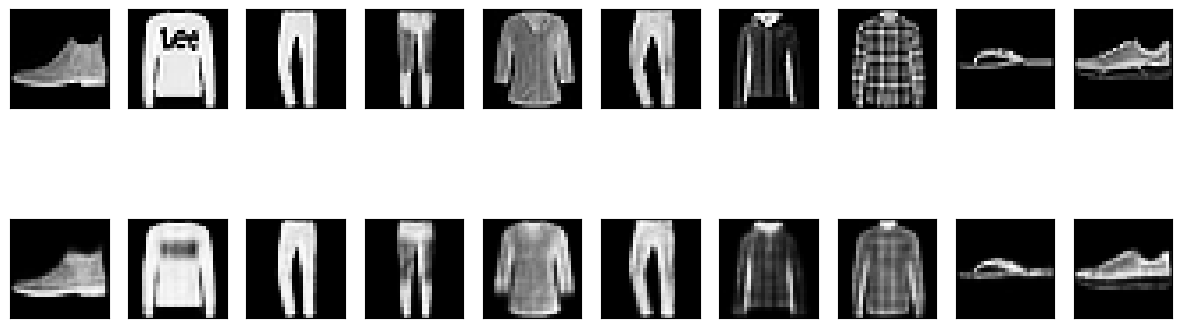

In [20]:
# orijinal ve yeniden yapılandırılan(decoded images) görüntüleri görselleştirme

n = 10

plt.figure(figsize = (15, 5))
for i in range(n):
    
    # orijinal görüntü
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28,28), cmap = "gray")
    ax.get_xaxis().set_visible(False) # x eksenini gizle
    ax.get_yaxis().set_visible(False)

    # decoded_images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28,28), cmap = "gray")
    ax.get_xaxis().set_visible(False) # x eksenini gizle
    ax.get_yaxis().set_visible(False)

plt.show()

In [21]:
# peak-snr: PSNR Metriği

def calculate_psnr(original, reconstructed):
    """
    Her iki görüntü arasındaki PSNR hesapla

    """
    mse = np.mean((original - reconstructed)**2)

    if mse == 0:
        return float("inf") # iki görüntü tamamen aynı ise psnr = sonsuz

    max_pixel = 1.0
    psnr = 20*np.log10(max_pixel / np.sqrt(mse))
    return psnr

In [22]:
# test verileri için psnr hesaplama
psnr_score = []

# ilk 100 örnek için yapalım
for i in range(100):
    original_img = x_test[i]
    reconstructed_img = decoded_images[i]
    score = calculate_psnr(original_img, reconstructed_img)
    psnr_score.append(score)

average_psnr = np.mean(psnr_score)
print(f"average_psnr: {average_psnr}")

average_psnr: 23.244839512561335


- PSNR'ın yüksek çıkması sonuçların iyi çıktığı anlamına gelir.